In [7]:
import numpy as np
import pandas as pd
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [8]:
bd1 = np.load('../dataset/seq_bathroom_1714007389.npy')
bd2 = np.load('../dataset/0_seq_bathroom.npy')
# 두 데이터셋을 합치기
bathroom = np.concatenate((bd1, bd2), axis=0)

In [9]:
sd1 = np.load('../dataset/seq_scissors_1714010055.npy')
sd2 = np.load('../dataset/1_seq_scissors.npy')

scissors=np.concatenate((sd1, sd2), axis = 0)

In [10]:
rd1 = np.load('../dataset/2_seq_rainbow.npy')
rd2 = np.load('../dataset/seq_rainbow_1714013879.npy')

rainbow = np. concatenate((rd1, rd2), axis = 0)

In [11]:
gd1 = np.load('../dataset/3_seq_ginseng.npy')
gd2 = np.load('../dataset/seq_ginseng_1714013922.npy')

ginseng = np.concatenate((gd1, gd2), axis = 0)

In [12]:
md1 = np.load('../dataset/4_seq_mountain.npy')
md2 = np.load('../dataset/seq_mountain_1714013963.npy')

mountain = np.concatenate((md1, md2), axis = 0)

In [13]:
gr1 = np.load('../dataset/5_seq_girl.npy')
gr2 = np.load('../dataset/seq_girl_1714014003.npy')

girl = np.concatenate ((gr1, gr2), axis = 0)

In [14]:
std1 = np.load('../dataset/6_seq_sometimes.npy')
std2 = np.load('../dataset/seq_sometimes_1714014045.npy')

sometimes = np.concatenate ((std1, std2), axis =0)

In [15]:
nd1 = np.load('../dataset/7_seq_nineteen.npy')
nd2 = np.load('../dataset/seq_nineteen_1714014092.npy')

nineteen = np.concatenate ((nd1, nd2), axis = 0)

In [16]:
rmd1 = np.load('../dataset/8_seq_remote.npy')
rmd2 = np.load('../dataset/seq_remote_1714014135.npy')

remote = np.concatenate ((rmd1, rmd2), axis = 0)

In [17]:
rjd1 = np.load('../dataset/9_seq_reject.npy')
rjd2 = np.load('../dataset/seq_reject_1714014979.npy')

reject = np.concatenate((rjd1, rjd2), axis =0)

In [18]:
actions = [
    'bathroom',
    'scissors',
    'rainbow',
    'ginseng',
    'mountain',
    'girl',
    'sometimes',
    'nineteen',
    'remote',
    'reject'
]

data = np.concatenate([
    bathroom,
    scissors,
    rainbow,
    ginseng,
    mountain,
    girl,
    sometimes,
    nineteen,
    remote,
    reject
], axis=0)

data.shape

(7325, 30, 100)

In [19]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(7325, 30, 99)
(7325,)


In [20]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(7325, 10)

In [21]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(6592, 30, 99) (6592, 10)
(733, 30, 99) (733, 10)


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                41984     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 44394 (173.41 KB)
Trainable params: 44394 (173.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=50,
    callbacks=[
        ModelCheckpoint('../models/model.keras', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/50


201/206 [============================>.] - ETA: 0s - loss: 62.8520 - acc: 0.3217
Epoch 1: val_acc improved from -inf to 0.24011, saving model to models\model.keras
206/206 [==============================] - 5s 11ms/step - loss: 62.4817 - acc: 0.3208 - val_loss: 51.1420 - val_acc: 0.2401 - lr: 0.0010
Epoch 2/50
202/206 [============================>.] - ETA: 0s - loss: 10.9600 - acc: 0.5555
Epoch 2: val_acc improved from 0.24011 to 0.77763, saving model to models\model.keras
206/206 [==============================] - 2s 8ms/step - loss: 10.7914 - acc: 0.5599 - val_loss: 2.6253 - val_acc: 0.7776 - lr: 0.0010
Epoch 3/50
203/206 [============================>.] - ETA: 0s - loss: 2.9388 - acc: 0.7460
Epoch 3: val_acc improved from 0.77763 to 0.82401, saving model to models\model.keras
206/206 [==============================] - 2s 9ms/step - loss: 2.9050 - acc: 0.7480 - val_loss: 1.0669 - val_acc: 0.8240 - lr: 0.0010
Epoch 4/50
206/206 [==============================] - ETA: 0s 

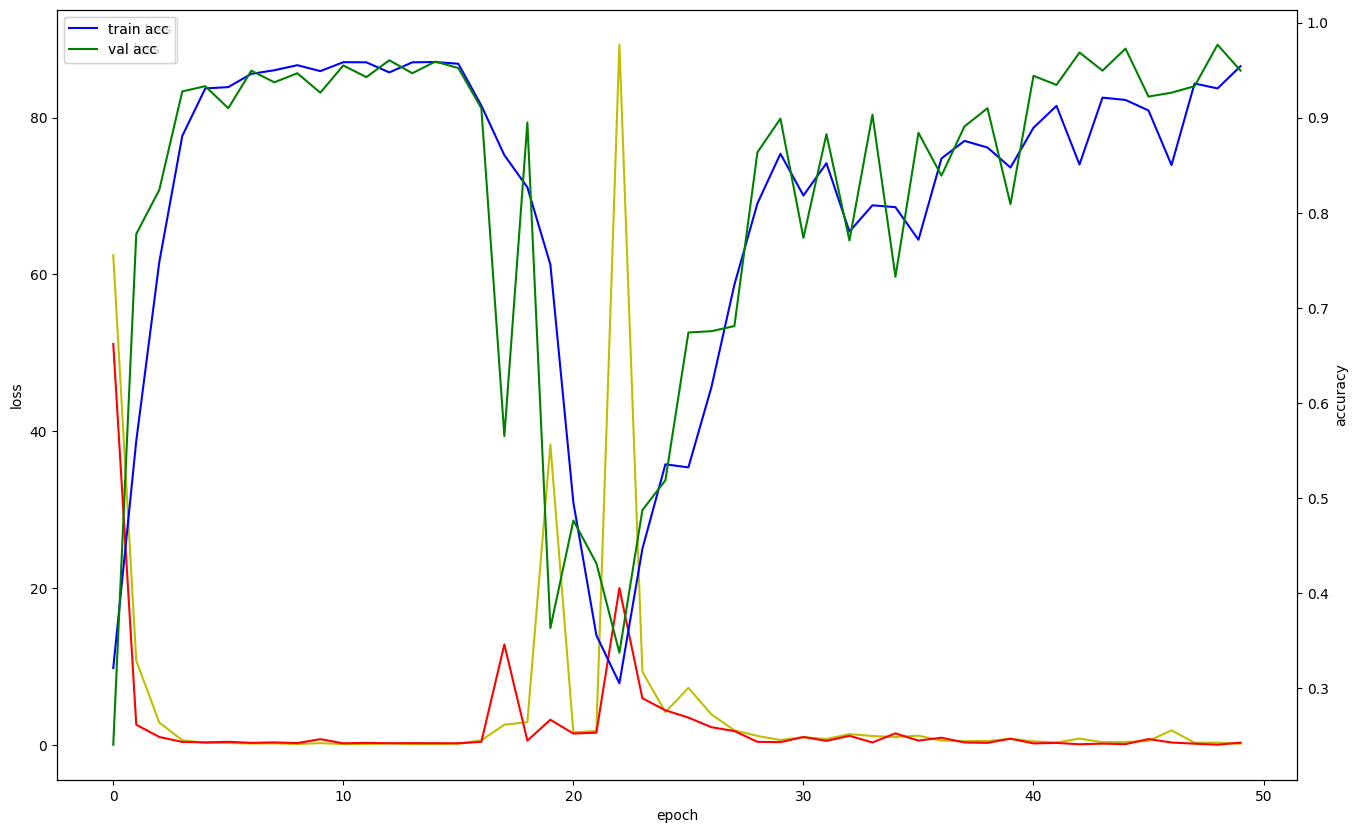

In [24]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [25]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('../models/model.keras')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

23/23 [==============================] - 0s 4ms/step


array([[[623,   2],
        [  2, 106]],

       [[661,   7],
        [  1,  64]],

       [[661,   0],
        [  0,  72]],

       [[694,   1],
        [  7,  31]],

       [[666,   0],
        [  0,  67]],

       [[707,   0],
        [  0,  26]],

       [[636,   5],
        [  0,  92]],

       [[646,   2],
        [  2,  83]],

       [[653,   0],
        [  3,  77]],

       [[633,   0],
        [  2,  98]]], dtype=int64)